In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

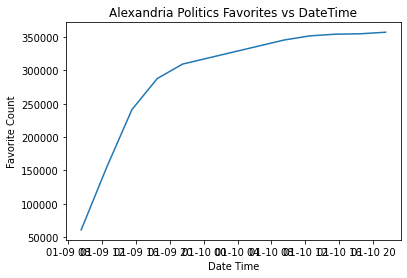

In [9]:
'''Date Time vs Favorites Cell'''

dataFrame_alexandria = pd.read_csv('/Users/ch_kus/Desktop/alexandria_3hr.csv')

dataFrame_alexandria = dataFrame_alexandria[0:10]

#define date as datetime column, parse the text to a datetime object
#change id to datetime column pd["Retweets"].plot()
#convert the string into datetime (string formatting for datetime)
dataFrame_alexandria["DateTime"] = pd.to_datetime(dataFrame_alexandria['DateTime'])
var = dataFrame_alexandria["DateTime"]

%matplotlib inline
plt.title("Alexandria Politics Favorites vs DateTime")
plt.xlabel("Date Time")
plt.ylabel("Favorite Count")
plt.plot(var, dataFrame_alexandria.Favorites)

#x axis labeling (range of datetimes)

#plot only a section of graph 

#plot the differences (derivative) - different dataframe

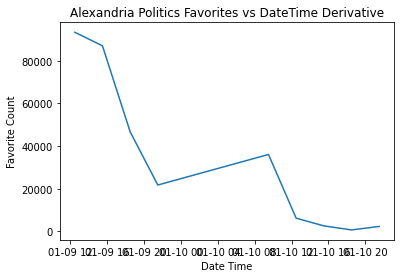

In [10]:
'''Derivative Graph (Favorites vs DateTime)'''

derivativeList = dataFrame_alexandria.Favorites.diff()

%matplotlib inline
plt.title("Alexandria Politics Favorites vs DateTime Derivative")
plt.xlabel("Date Time")
plt.ylabel("Favorite Count")
plt.plot(var, derivativeList)

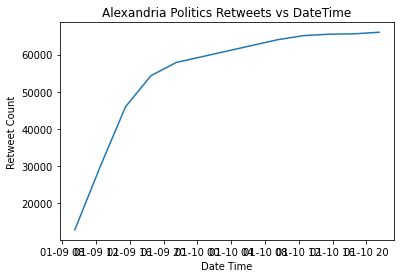

In [11]:
'''Favorites vs Retweets Data Graph'''

%matplotlib inline
plt.title("Alexandria Politics Retweets vs DateTime")
plt.xlabel("Date Time")
plt.ylabel("Retweet Count")
plt.plot(var, dataFrame_alexandria.Retweets)

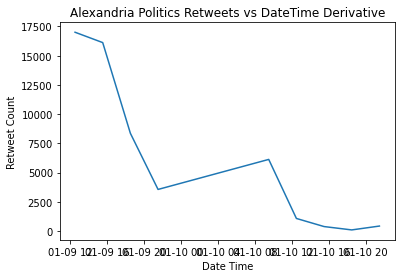

In [12]:
'''Derivative Graph (Retweets vs DateTime)'''

derivativeList_r = dataFrame_alexandria.Retweets.diff()

%matplotlib inline
plt.title("Alexandria Politics Retweets vs DateTime Derivative")
plt.xlabel("Date Time")
plt.ylabel("Retweet Count")
plt.plot(var, derivativeList_r)

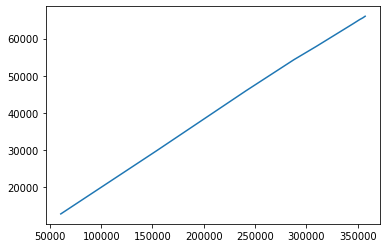

In [13]:
'''Favorites vs Retweets Data Graph'''

plt.plot(dataFrame_alexandria.Favorites, dataFrame_alexandria.Retweets)
#calculate correlation coefficient, find linear regressions, and confidence interval

#Find methods to compute Time series 

In [14]:
'''Calculating Pearson Correlation Cell'''

#calculates correlation (Note: try to be explicit)
dataFrame_alexandria.corr(method ='pearson')  

,Favorites,Retweets
Favorites,1.000000,0.999855
Retweets,0.999855,1.000000


In [15]:
'''Calculating Slope Cell'''

X = dataFrame_alexandria.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dataFrame_alexandria.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #Y_pred stores the y coordinates of the line of best fit

#Play with the parameters

#Find the slove of red line and find the confidence interval

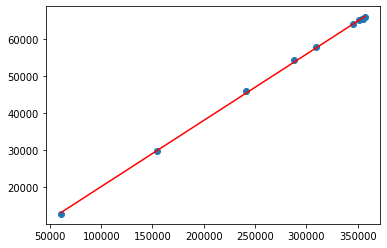

In [16]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [17]:
'''Calculating Slope annd Y-Intercept of Regression Line Cell'''

#Calculate slope by dividing the two calculated values (Y2-Y1) and (X2-X1)

print(linear_regressor.coef_[0][0])

#Calculate the Y-Intercept of line
print(linear_regressor.intercept_[0])

0.178801520816798
2318.4827533650387


In [18]:
from scipy import stats

import itertools
x = list(itertools.chain(*X))
y = list(itertools.chain(*Y))
#print(X)
#print(Y)
#x = np.array(X)
#y = np.array(Y)
#print(x)
#print(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
confidence_interval = 2.58*std_err
confidence_interval

(slope-confidence_interval, slope+confidence_interval)

(0.17602393748256606, 0.18157910415103)